In [118]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv('./data/drug_reviews_cleaned.csv')
data

,User_ID,drugName,condition,review,rating,date,usefulCount,ratings_simplified
0,164952,Phentermine / topiramate,Weight Loss,"""I have been on the Qysmia for 3 weeks now. I...",8.0,"December 25, 2015",38,3
1,145900,Qsymia,Weight Loss,"""My Dr agreed to over see putting me on Qsymia...",9.0,"February 24, 2013",46,4
2,52117,Adipex-P,Weight Loss,"""I just started Adipex-P 37.5mg on March 6th, ...",8.0,"March 10, 2011",7,3
3,145785,Qsymia,Weight Loss,"""Began taking Qsymia 3.75 in June 2013. Its on...",10.0,"May 26, 2014",61,4
4,145840,Qsymia,Weight Loss,"""Made me jittery and could not sleep. Lost wei...",1.0,"August 21, 2013",59,1
...,...,...,...,...,...,...,...,...
3604,145579,Qsymia,Weight Loss,"""You may lose weight, but you will probably lo...",3.0,"May 19, 2016",48,1
3605,128296,Phentermine,Weight Loss,"""I began taking Adipex 8/2014 &amp; by 10/2015...",10.0,"January 5, 2016",23,4
3606,185393,Saxenda,Weight Loss,"""I started my injections on the 22nd of July, ...",10.0,"August 5, 2017",7,4
3607,39213,Contrave,Weight Loss,"""Today marks the first day of my 3rd week - 2 ...",5.0,"April 13, 2017",3,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             3609 non-null   int64  
 1   drugName            3609 non-null   object 
 2   condition           3609 non-null   object 
 3   review              3609 non-null   object 
 4   rating              3609 non-null   float64
 5   date                3609 non-null   object 
 6   usefulCount         3609 non-null   int64  
 7   ratings_simplified  3609 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 225.7+ KB


In [5]:
X = data['review']
y = data['ratings_simplified']

In [6]:
y.value_counts()

4    2305
3     576
1     416
2     312
Name: ratings_simplified, dtype: int64

In [19]:
data[X.duplicated()]

,User_ID,drugName,condition,review,rating,date,usefulCount,ratings_simplified
40,39460,Contrave,Weight Loss,"""I started Contrave 3.5 weeks ago. At the end...",4.0,"September 7, 2016",10,2
131,145488,Qsymia,Weight Loss,"""Let me start by saying I am 59 years old. Unt...",10.0,"August 16, 2017",104,4
149,164686,Phentermine / topiramate,Weight Loss,"""Update: Started Qsymia on 3/23/17 and today i...",10.0,"October 27, 2017",10,4
166,39091,Contrave,Weight Loss,"""I have been taking Contrave daily for four mo...",10.0,"June 14, 2017",27,4
172,165204,Phentermine / topiramate,Weight Loss,"""Just started Qsymia 9/24/13 weighing in @ 239...",10.0,"October 4, 2013",80,4
...,...,...,...,...,...,...,...,...
3602,76942,Lorcaserin,Weight Loss,"""5&#039;11 and 255 lbs started three months a...",10.0,"June 24, 2015",53,4
3604,145579,Qsymia,Weight Loss,"""You may lose weight, but you will probably lo...",3.0,"May 19, 2016",48,1
3605,128296,Phentermine,Weight Loss,"""I began taking Adipex 8/2014 &amp; by 10/2015...",10.0,"January 5, 2016",23,4
3606,185393,Saxenda,Weight Loss,"""I started my injections on the 22nd of July, ...",10.0,"August 5, 2017",7,4


In [28]:
find = data.iat[40,3]

In [30]:
data[data['review']==find]

,User_ID,drugName,condition,review,rating,date,usefulCount,ratings_simplified
27,54937,Bupropion / naltrexone,Weight Loss,"""I started Contrave 3.5 weeks ago. At the end...",4.0,"September 7, 2016",10,2
40,39460,Contrave,Weight Loss,"""I started Contrave 3.5 weeks ago. At the end...",4.0,"September 7, 2016",10,2


In [20]:
data.duplicated(subset = ['review', 'ratings_simplified']).sum()

974

In [31]:
find

'"I started Contrave 3.5 weeks ago.  At the end of week two I started with the headaches, and progressed into being so dizzy I couldn&#039;t make it to work.  Even the traffic was making me throw up, by the movement.  Into week 3, I was out of work several days because of the migraine headaches, and dizzy spells.  No relief in sight, even while taking 2 to 3 800mg ibuproprin a day.  I finally had to stop the medication, while trying to wean myself off at one pill in the am a day, I&#039;m still sick all day.  I think I&#039;m one that just can&#039;t take this medication, and wish I could, because I need the lose this weight.  I&#039;m 210lbs,  5&#039;3, at 58 yrs old, help!"'

In [36]:
data_cleaned = data.drop_duplicates(subset=['review'])

In [37]:
X = data_cleaned['review']
y = data_cleaned['ratings_simplified']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

In [119]:
from nltk import word_tokenize

In [130]:
class LemmaTokenizer():
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t.lower()) for t in word_tokenize(doc)] 

In [139]:
params1 = { 'vectorizer': [CountVectorizer()],
            'vectorizer__max_features': [5000, 10_000],
            'vectorizer__min_df': [1, 2, 3],
            'vectorizer__max_df': [.1, .25, .5, 1.],
            # 'vectorizer__stop_words': ['english', None],
            # 'vectorizer__lowercase': [True, False],
            'vectorizer__ngram_range': [(1, 3)],


            # 'model__n_estimators': [25, 50, 100]
            'model__C': np.logspace(-3, 3),
            'model__l1_ratio': np.linspace(.05, 1)
}

params2 = { 'vectorizer': [TfidfVectorizer()],
            'vectorizer__max_features': [5000, 10_000],
            'vectorizer__min_df': [1, 2, 3],
            'vectorizer__max_df': [.1, .25, .5, 1.],
            # 'vectorizer__stop_words': ['english', None],
            # 'vectorizer__lowercase': [True, False],
            'vectorizer__ngram_range': [(1, 3)],
            
            # 'model__n_estimators': [25, 50, 100]
            'model__C': np.logspace(-3, 3),
            'model__l1_ratio': np.linspace(.05, 1)
}

params = [
    params1,
    params2

]


# pipe = Pipeline(
#     [
#     ('vectorizer', CountVectorizer()),
#     ('model', DecisionTreeClassifier(class_weight='balanced'))
#     ]
#     )

pipe = Pipeline(
    [
    ('vectorizer', CountVectorizer()),
    ('model', LogisticRegression(max_iter=10_000, class_weight='balanced', solver='saga', l1_ratio=.5))
    ]
    )

# pipe = Pipeline(
#     [
#     ('vectorizer', CountVectorizer()),
#     ('model', RandomForestClassifier(class_weight='balanced'))
#     ]
#     )

# pipe = Pipeline(
#     [
#     ('vectorizer', CountVectorizer()),
#     ('model', BaggingClassifier(class_weight='balanced'))
#     ]
#     )

# pipe = Pipeline(
#     [
#     ('vectorizer', CountVectorizer()),
#     ('model', MultinomialNB())
#     ]
#     )



In [140]:
pipe.fit(X_train, y_train)

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('model',
                 LogisticRegression(class_weight='balanced', l1_ratio=0.5,
                                    max_iter=10000, solver='saga'))])

In [141]:
rs = RandomizedSearchCV(pipe, params, scoring='balanced_accuracy')

In [142]:
rs.fit(X_train, y_train)

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

RandomizedSearchCV(estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('model',
                                              LogisticRegression(class_weight='balanced',
                                                                 l1_ratio=0.5,
                                                                 max_iter=10000,
                                                                 solver='saga'))]),
                   param_distributions=[{'model__C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03...
       0.72857143, 0.74795918, 0.76734694, 0.78673469, 0.80612245,
       0.8255102 , 0.84489796, 0.86428571, 0.88367347, 0.90306122,
       0.92244898, 0.94183673, 0.96122449, 0.98061224, 1.        ]),
                                         'vectorizer': [TfidfVectorizer()],
                                

In [ ]:
pd.DataFrame(rs.cv_results_)

In [143]:
rs.best_estimator_

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.1, max_features=5000, min_df=3,
                                 ngram_range=(1, 3))),
                ('model',
                 LogisticRegression(C=0.005428675439323859,
                                    class_weight='balanced',
                                    l1_ratio=0.3020408163265306, max_iter=10000,
                                    solver='saga'))])

* DecisionTree score: .55538
* LogisticReg score: .6494 (bal: .4965)
* RandForest score: .6737 (bal: .3402)
* Bayes score: .6358 (bal: .4611)


In [144]:
rs.score(X_test, y_test)

0.47321907064897717

In [145]:
accuracy_score(y_test, rs.predict(X_test))

0.5872534142640364

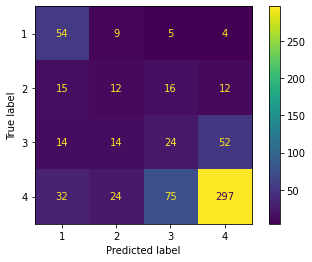

In [146]:
ConfusionMatrixDisplay.from_estimator(rs.best_estimator_, X_test, y_test);

In [63]:
y_test.value_counts(normalize=True)

4    0.649469
3    0.157815
1    0.109256
2    0.083460
Name: ratings_simplified, dtype: float64